In [102]:
import ast
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
name_order = pd.read_csv("results/results_0-16.csv")["name"].unique()
col_order = []
for model in ["logistic regression", "random forest"]:
    for feature_type in ["truth", "pandas", "tfdv", "autogluon", "rf"]:
        col_order.append((model, feature_type))

In [4]:
results = pd.read_csv("results/results_0-16.csv")[["name", "model", "linear_holdout", "rf_holdout"]].rename({"name": "dataset", "linear_holdout":"logistic regression", "rf_holdout":"random forest"}, axis=1
                                                                  ).pivot(index="dataset", columns="model").loc[name_order, col_order]
results

logistic regression                                          \
model                   truth    pandas      tfdv autogluon        rf   
dataset                                                                 
cancer               0.600000  0.600000  0.600000  0.600000  0.600000   
mfeat                0.962000  0.962000  0.962000  0.962000  0.962000   
nursery              0.920602  0.920833  0.920602  0.920602  0.920602   
audiology            0.734783  0.717391  0.734783  0.700000  0.734783   
hayes                0.755556  0.585185  0.585185  0.585185  0.518519   
supreme              0.994328  0.764488  0.763502  0.764488  0.991862   
flare                0.907692  0.907692  0.907692  0.907692  0.907692   
kropt                0.350677  0.309551  0.309016  0.309016  0.335816   
boxing               0.874074  0.629630  0.659259  0.659259  0.659259   
flags                0.748718  0.625641  0.615385  0.651282  0.620513   
diggle               1.000000  1.000000  1.000000  1.000000  1.000000   
heart                0.842623  0.839344  0.832787  0.839344  0.842623   
sleuth               0.711111  0.722222  0.722222  0.722222  0.711111   
apnea2               0.920000  0.917895  0.920000  0.920000  0.911579   
auto-mpg             0.977215  0.982278  0.830380  0.830380  0.807595   
churn                0.793045  0.788786  0.790774  0.790774  0.790490   
nyc                  0.602915  0.602915  0.602915  0.606025  0.606025   

          random forest                                          
model             truth    pandas      tfdv autogluon        rf  
dataset                                                          
cancer         0.666667  0.666667  0.666667  0.666667  0.666667  
mfeat          0.941000  0.941000  0.941000  0.941000  0.941000  
nursery        0.982407  0.978781  0.982407  0.982407  0.982407  
audiology      0.721739  0.713043  0.721739  0.708696  0.721739  
hayes          0.785185  0.711111  0.711111  0.711111  0.644444  
supreme        0.994081  0.994081  0.995068  0.994081  0.995561  
flare          0.892308  0.886154  0.901538  0.895385  0.876923  
kropt          0.687847  0.626301  0.653742  0.653742  0.563899  
boxing         0.777778  0.629630  0.666667  0.666667  0.666667  
flags          0.723077  0.769231  0.743590  0.733333  0.728205  
diggle         1.000000  1.000000  1.000000  1.000000  1.000000  
heart          0.862295  0.849180  0.832787  0.849180  0.862295  
sleuth         0.766667  0.766667  0.766667  0.766667  0.766667  
apnea2         0.901053  0.886316  0.892632  0.892632  0.911579  
auto-mpg       0.941772  0.954430  0.762025  0.762025  0.762025  
churn          0.787651  0.779134  0.778992  0.778424  0.778424  
nyc            0.669388  0.669388  0.689602  0.692517  0.692517

In [5]:
def row_diffs(row, classification=True):
    if classification:
        models = ['logistic regression', "random forest"]
    else:
        models = ['linear regression', "random forest"]
    features = ["pandas", "rf", "tfdv", "autogluon"]
    for model in models:
        truth = row[model]["truth"]
        for feature in features:
            row[model][feature] -= truth
    return row
            
    
results_table = (results.apply(row_diffs, axis=1) * 100).round(2)
results_table

logistic regression                                random forest  \
model                   truth pandas   tfdv autogluon     rf         truth   
dataset                                                                      
cancer                  60.00   0.00   0.00      0.00   0.00         66.67   
mfeat                   96.20   0.00   0.00      0.00   0.00         94.10   
nursery                 92.06   0.02   0.00      0.00   0.00         98.24   
audiology               73.48  -1.74   0.00     -3.48   0.00         72.17   
hayes                   75.56 -17.04 -17.04    -17.04 -23.70         78.52   
supreme                 99.43 -22.98 -23.08    -22.98  -0.25         99.41   
flare                   90.77   0.00   0.00      0.00   0.00         89.23   
kropt                   35.07  -4.11  -4.17     -4.17  -1.49         68.78   
boxing                  87.41 -24.44 -21.48    -21.48 -21.48         77.78   
flags                   74.87 -12.31 -13.33     -9.74 -12.82         72.31   
diggle                 100.00   0.00   0.00      0.00   0.00        100.00   
heart                   84.26  -0.33  -0.98     -0.33   0.00         86.23   
sleuth                  71.11   1.11   1.11      1.11   0.00         76.67   
apnea2                  92.00  -0.21   0.00      0.00  -0.84         90.11   
auto-mpg                97.72   0.51 -14.68    -14.68 -16.96         94.18   
churn                   79.30  -0.43  -0.23     -0.23  -0.26         78.77   
nyc                     60.29   0.00   0.00      0.31   0.31         66.94   

                                          
model     pandas   tfdv autogluon     rf  
dataset                                   
cancer      0.00   0.00      0.00   0.00  
mfeat       0.00   0.00      0.00   0.00  
nursery    -0.36   0.00      0.00   0.00  
audiology  -0.87   0.00     -1.30   0.00  
hayes      -7.41  -7.41     -7.41 -14.07  
supreme     0.00   0.10      0.00   0.15  
flare      -0.62   0.92      0.31  -1.54  
kropt      -6.15  -3.41     -3.41 -12.39  
boxing    -14.81 -11.11    -11.11 -11.11  
flags       4.62   2.05      1.03   0.51  
diggle      0.00   0.00      0.00   0.00  
heart      -1.31  -2.95     -1.31   0.00  
sleuth      0.00   0.00      0.00   0.00  
apnea2     -1.47  -0.84     -0.84   1.05  
auto-mpg    1.27 -17.97    -17.97 -17.97  
churn      -0.85  -0.87     -0.92  -0.92  
nyc         0.00   2.02      2.31   2.31

In [29]:
regression_output = pd.read_csv("results/results_reg.csv")
name_order = regression_output["name"].unique()
col_order = []
for model in ["linear regression", "random forest"]:
    for feature_type in ["truth", "pandas", "tfdv", "autogluon", "rf"]:
        col_order.append((model, feature_type))
results_reg = regression_output[["name", "model", "linear_holdout", "rf_holdout"]
                               ].rename({"name": "dataset", "linear_holdout":"linear regression", "rf_holdout":"random forest"}, axis=1
                                  ).pivot(index="dataset", columns="model"
                                  ).loc[name_order, col_order]
regression_diffs = lambda x: row_diffs(x, classification=False)
regression_table = (results_reg.apply(regression_diffs, axis=1) * 100).round(2)
regression_table

linear regression                                      random forest  \
model                truth  pandas      tfdv autogluon       rf         truth   
dataset                                                                         
mba                  36.26    4.63      4.63      4.63     4.63         38.42   
vineyard            325.51  172.70    172.70    172.70   -28.88        273.44   
apnea            222453.70  -87.75  -1829.47  -1829.47 -1077.66     137622.06   
accident          43539.13    0.00  41515.82      0.00     0.00      59855.11   

                                                 
model      pandas      tfdv autogluon        rf  
dataset                                          
mba          8.64      8.04      8.64      8.04  
vineyard    40.40     40.40     40.40      3.23  
apnea    -1492.98  -2051.01  -2051.01 -12973.44  
accident     0.00  46594.70      0.00      0.00

In [ ]:
print(results_table.to_latex())

In [ ]:
print(regression_table.to_latex())

In [100]:
table_cols = results_table.columns.drop([("logistic regression", "truth"), ("random forest", "truth")])
performance = pd.DataFrame(columns=table_cols)

#underperforms
for model in ['logistic regression', 'random forest']:
    for label in ["pandas", "tfdv", "autogluon", "rf"]:
        if model == "logistic regression":
            reg_model = "linear regression"
        else:
            reg_model = "random forest"
        max_vals = results_table[model].drop("truth", axis=1).max(axis=1)
        
        max_vals_reg = regression_table[reg_model].drop("truth", axis=1).max(axis=1)
        
        performance.loc["Underperforms truth", (model, label)] = (results_table[(model, label)] < 0).sum() \
                                                                + (regression_table[(reg_model, label)] < 0).sum()
        performance.loc["Matches truth", (model, label)] = (results_table[(model, label)] == 0).sum() \
                                                                + (regression_table[(reg_model, label)] == 0).sum()
        performance.loc["Outperforms truth", (model, label)] = (results_table[(model, label)] > 0).sum() \
                                                                + (regression_table[(reg_model, label)] > 0).sum()
        performance.loc["Best performing tool for a dataset", (model, label)] = results_table[model].drop("truth", axis=1).apply(lambda col: col==max_vals).sum()[label] \
                                                                                + regression_table[reg_model].drop("truth", axis=1).apply(lambda col: col==max_vals_reg).sum()[label]
        
performance

logistic regression                     \
model                                           pandas tfdv autogluon  rf   
Underperforms truth                                 10    9        10  10   
Matches truth                                        6    8         7   9   
Outperforms truth                                    5    4         4   2   
Best performing tool for a dataset                  11   13        13  11   

                                   random forest                     
model                                     pandas tfdv autogluon  rf  
Underperforms truth                           10    8         9   7  
Matches truth                                  7    6         7   8  
Outperforms truth                              4    7         5   6  
Best performing tool for a dataset            11   12        11  11

In [101]:
print(performance.to_latex())

\begin{tabular}{lllllllll}
\toprule
{} & \multicolumn{4}{l}{logistic regression} & \multicolumn{4}{l}{random forest} \\
model &              pandas & tfdv & autogluon &  rf &        pandas & tfdv & autogluon &  rf \\
\midrule
Underperforms truth                &                  10 &    9 &        10 &  10 &            10 &    8 &         9 &   7 \\
Matches truth                      &                   6 &    8 &         7 &   9 &             7 &    6 &         7 &   8 \\
Outperforms truth                  &                   5 &    4 &         4 &   2 &             4 &    7 &         5 &   6 \\
Best performing tool for a dataset &                  11 &   13 &        13 &  11 &            11 &   12 &        11 &  11 \\
\bottomrule
\end{tabular}



In [107]:
preds = pd.read_csv("results/predictions.csv")
preds['truth'] = preds['truth'].apply(eval)
preds['rf'] = preds['rf'].apply(eval)
preds['pandas'] = preds['pandas'].apply(eval)
preds['tfdv'] = preds['tfdv'].apply(eval)
preds['agl'] = preds['agl'].apply(eval)
preds.head()

,dataset,truth,rf,pandas,tfdv,agl
0,cancer,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,mfeat,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,nursery,"[1, 1, 1, 1, 1, 1, 1, 1]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[8, 8, 8, 8, 8, 8, 8, 8]","[1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]"
3,audiology,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 7, 7, 1, 1, 7, 7, 1, 1, ..."
4,hayes,"[7, 1.0, 1.0, 1.0, 1.0]","[0.0, 1.0, 1.0, 0.0, 0.0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]"


In [ ]:
len(preds)

In [ ]:
pred_lens = preds.drop("dataset", axis=1).apply(lambda col: col.apply(len))
pred_lens.head()

In [ ]:
preds[pred_lens["truth"] != pred_lens["rf"]]

In [ ]:
pred_lens.sum()

In [ ]:
flatten_preds = lambda p: np.concatenate(p.apply(lambda x: [int(num) for num in x]).to_list()).flatten()

In [ ]:
accuracy_score(preds[["rf"]].apply(flatten_preds), preds[["truth"]].apply(flatten_preds))

In [ ]:
(preds["truth"] == 7).sum()

In [ ]:
preds[["truth"]].apply(flatten_preds)["truth"]

In [ ]:
preds["truth"]

In [6]:
results_table

logistic regression                                random forest  \
model                   truth pandas   tfdv autogluon     rf         truth   
dataset                                                                      
cancer                  60.00   0.00   0.00      0.00   0.00         66.67   
mfeat                   96.20   0.00   0.00      0.00   0.00         94.10   
nursery                 92.06   0.02   0.00      0.00   0.00         98.24   
audiology               73.48  -1.74   0.00     -3.48   0.00         72.17   
hayes                   75.56 -17.04 -17.04    -17.04 -23.70         78.52   
supreme                 99.43 -22.98 -23.08    -22.98  -0.25         99.41   
flare                   90.77   0.00   0.00      0.00   0.00         89.23   
kropt                   35.07  -4.11  -4.17     -4.17  -1.49         68.78   
boxing                  87.41 -24.44 -21.48    -21.48 -21.48         77.78   
flags                   74.87 -12.31 -13.33     -9.74 -12.82         72.31   
diggle                 100.00   0.00   0.00      0.00   0.00        100.00   
heart                   84.26  -0.33  -0.98     -0.33   0.00         86.23   
sleuth                  71.11   1.11   1.11      1.11   0.00         76.67   
apnea2                  92.00  -0.21   0.00      0.00  -0.84         90.11   
auto-mpg                97.72   0.51 -14.68    -14.68 -16.96         94.18   
churn                   79.30  -0.43  -0.23     -0.23  -0.26         78.77   
nyc                     60.29   0.00   0.00      0.31   0.31         66.94   

                                          
model     pandas   tfdv autogluon     rf  
dataset                                   
cancer      0.00   0.00      0.00   0.00  
mfeat       0.00   0.00      0.00   0.00  
nursery    -0.36   0.00      0.00   0.00  
audiology  -0.87   0.00     -1.30   0.00  
hayes      -7.41  -7.41     -7.41 -14.07  
supreme     0.00   0.10      0.00   0.15  
flare      -0.62   0.92      0.31  -1.54  
kropt      -6.15  -3.41     -3.41 -12.39  
boxing    -14.81 -11.11    -11.11 -11.11  
flags       4.62   2.05      1.03   0.51  
diggle      0.00   0.00      0.00   0.00  
heart      -1.31  -2.95     -1.31   0.00  
sleuth      0.00   0.00      0.00   0.00  
apnea2     -1.47  -0.84     -0.84   1.05  
auto-mpg    1.27 -17.97    -17.97 -17.97  
churn      -0.85  -0.87     -0.92  -0.92  
nyc         0.00   2.02      2.31   2.31

In [25]:
pandas_deltas = -1 * pd.concat([results_table[("logistic regression", "pandas")],
                           results_table[("random forest", "pandas")]]).values
tfdv_deltas = -1 * pd.concat([results_table[("logistic regression", "tfdv")],
                         results_table[("random forest", "tfdv")]]).values
autogluon_deltas = -1 * pd.concat([results_table[("logistic regression", "autogluon")],
                              results_table[("random forest", "autogluon")]]).values
rf_deltas = -1 * pd.concat([results_table[("logistic regression", "rf")],
                       results_table[("random forest", "rf")]]).values

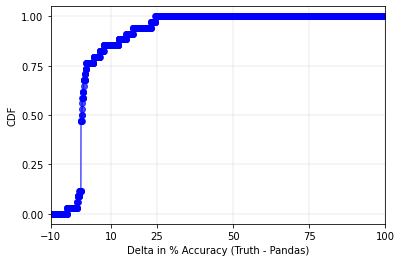

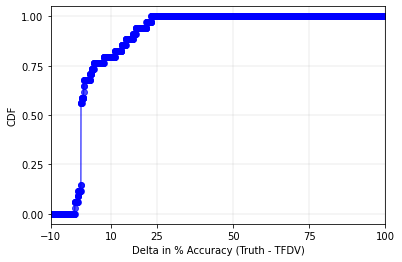

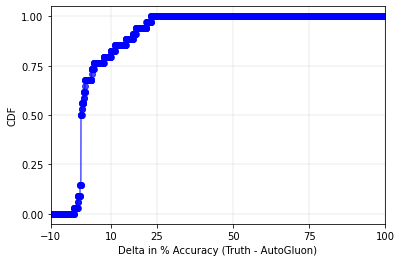

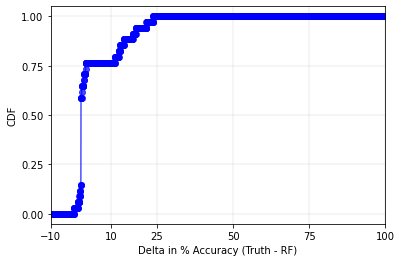

In [79]:
def plot_cum_dist1(list1, axis_title, plot_title, maxval):
    
    plotval = maxval + 0.05

    counts1, bin_edges1 = np.histogram(list1, bins=np.arange(-10.05,plotval,0.05), density=False)
    cdf1 = np.cumsum(counts1)*1.0/sum(counts1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.set_xlim([-10,100])
    
    plt.xticks([-10,10,25,50,75,100])
    plt.yticks([0,0.25,0.5,0.75,1])
    
    plt.xlabel("Delta in %% Accuracy (Truth - %s)" % axis_title)
    plt.ylabel("CDF")
    
    plt.plot(bin_edges1[1:], cdf1,color='b', marker='o',alpha=0.7)

    ax.grid(color='grey', linestyle='-', linewidth=0.15) 
    plt.show()
    plt.savefig("plots/" + axis_title + '_' + "CDF" + '.png')
    plt.close()


# plot_cum_dist(lst_PD, lst_TFDV, lst_AGL, lst_RF, 'FullPlot', 'ALL',101)
plot_cum_dist1(pandas_deltas, 'Pandas', 'ALL',101)
plot_cum_dist1(tfdv_deltas, 'TFDV', 'ALL',101)
plot_cum_dist1(autogluon_deltas, 'AutoGluon', 'ALL',101)
plot_cum_dist1(rf_deltas, 'RF', 'ALL',101)

In [75]:
regression_table

linear regression                                      random forest  \
model                truth  pandas      tfdv autogluon       rf         truth   
dataset                                                                         
mba                  36.26    4.63      4.63      4.63     4.63         38.42   
vineyard            325.51  172.70    172.70    172.70   -28.88        273.44   
apnea            222453.70  -87.75  -1829.47  -1829.47 -1077.66     137622.06   
accident          43539.13    0.00  41515.82      0.00     0.00      59855.11   

                                                 
model      pandas      tfdv autogluon        rf  
dataset                                          
mba          8.64      8.04      8.64      8.04  
vineyard    40.40     40.40     40.40      3.23  
apnea    -1492.98  -2051.01  -2051.01 -12973.44  
accident     0.00  46594.70      0.00      0.00

In [37]:
reg_pandas_deltas = pd.concat([regression_table[("linear regression", "pandas")],
                           regression_table[("random forest", "pandas")]]).values
reg_tfdv_deltas = pd.concat([regression_table[("linear regression", "tfdv")],
                         regression_table[("random forest", "tfdv")]]).values
reg_autogluon_deltas = pd.concat([regression_table[("linear regression", "autogluon")],
                              regression_table[("random forest", "autogluon")]]).values
reg_rf_deltas = pd.concat([regression_table[("linear regression", "rf")],
                       regression_table[("random forest", "rf")]]).values

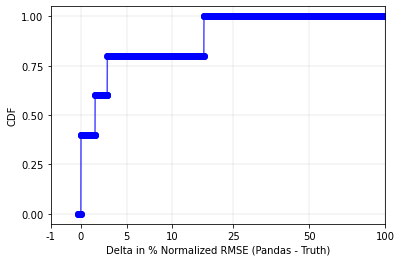

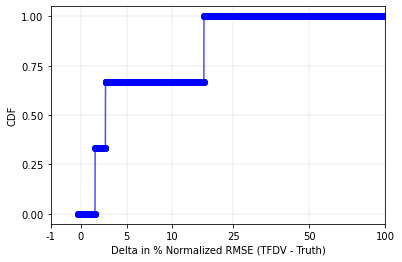

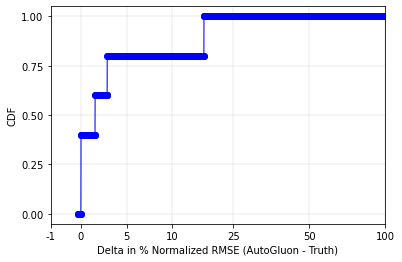

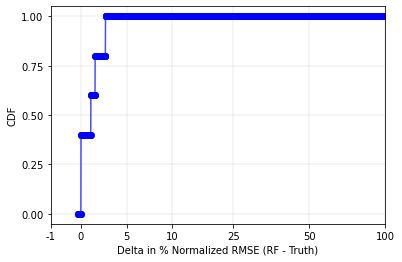

In [77]:
def plot_cum_dist2(list1, axis_title, plot_title, maxval):

    plotval = maxval + 0.05

    counts1, bin_edges1 = np.histogram(list1, bins=np.arange(-1.05,plotval,0.05), density=False)
    cdf1 = np.cumsum(counts1)*1.0/sum(counts1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.set_xlim([-1,100])
    
    plt.xticks([-10,0,15,30,50,75, 100],[-1,0,5,10,25,50,100])
    plt.yticks([0,0.25,0.5,0.75,1])
    
    plt.xlabel("Delta in %% Normalized RMSE (%s - Truth)" % axis_title)
    plt.ylabel("CDF")
    
    plt.plot(bin_edges1[1:], cdf1,color='b', marker='o',alpha=0.7)

    ax.grid(color='grey', linestyle='-', linewidth=0.15) 
    plt.show()
    plt.savefig("plots/" + axis_title + '_' + "Regression_CDF" + '.png', dpi = 400)
    plt.close()

plot_cum_dist2(reg_pandas_deltas, 'Pandas', 'ALL',101)
plot_cum_dist2(reg_tfdv_deltas, 'TFDV', 'ALL',101)
plot_cum_dist2(reg_autogluon_deltas, 'AutoGluon', 'ALL',101)
plot_cum_dist2(reg_rf_deltas, 'RF', 'ALL',101)


In [106]:
pickle.load(open("resources/dictionaryName.pkl", 'rb'))

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


CountVectorizer(analyzer='char', ngram_range=(2, 2))